# Gas Discharge & Stellar Feedback-driven Outflows (Part 3 /3):
## Ram Pressure, Accretion Times, Distributions
`-- Leo Lonzarich, 17 November 2021 // [Updated 29-11-21] --`


### Table of Contents
- [Ram Pressure Calculations for Discharged Gas](#ram)
    - [Identifying Ram Pressures](#ramdis)
    
- [Accretion Times](#acctime)
    - [General Accretion Times](#gen)
    - [Supernova Heating](#sne)

### General Comments on the Contents
- Repeated pids that turn up in the data sets below (e.g. 'ejected,' 'expelled,' 'discharged') should mean that the same particle has been accreted and reejected more than once --- hence its reoccurance in the set.


- The datasets used in this notebook: (note that each logs the properties for their respective particles for the period proceeding the differentiating event)

    - **Ejected/Expelled Datasets of pulled from Akins:**
        - *Ejected*: Gas particles that have been removed from their respective satellite galaxy's disk to the halo.
        - *Expelled*: Gas particles (within the disk or halo of their respective satellite galaxy) that have been removed beyond the virial radius of their satellite; that is, all gas particles removed to the field.
        
    - **Discharge Datasets From Lonzarich:**
        - *Discharged*: Gas particles that have been removed from the disk of their respective satellite galaxy. This includes both gas moved to halo, and that moved beyond the virial radius.
        - *Predischarged*: Contains the same particles in *Discharged*, but with properties of each particle logged prior to discharge.
        - *Accreted*: Gas particles in the halo or beyond the virial radius of their respective satellite as the result of a discharge event, but that were accreted back onto the satellite's disk.
        - *Heated*: Gas particles in *Discharged* that were also supernova-heated at time of discharge (i.e., their 'cooling' parameter was turned off).
        - *Preheated*: Contains the same particles in *Heated*, but with properties of each particle logged prior to discharge.

    
    
- Units for key values used in this notebook:
    - *Time* is in Gigayears $(Gyrs)$.
    - *Distances* in kiloparsecs $(kpc)$.
    - *Velocities* in kilometers per second $(km \ s^{-1})$.
    - *Masses* in solar masses $(Msol)$.

In [1]:
import numpy as np
import pylab
import pynbody
import pynbody.plot.sph as sph
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

from astropy import units
from astropy import constants as c

import warnings
warnings.filterwarnings("ignore")

from compiler import *
from analysis import * 
from ramdischarge import *

In [2]:
path = f'{rootPath}Stellar_Feedback_Code/SNeData/discharged_particles.hdf5'
with pd.HDFStore(path) as hdf:
    keys = np.array([h[1:] for h in hdf.keys()])

# listing dwarf galaxies of simulations that are viable for study (gaseous, satellite, etc).
print(len(keys), 'Available Keys:', *keys)

19 Available Keys: h148_13 h148_278 h148_28 h148_283 h148_329 h148_37 h148_45 h148_68 h148_80 h229_20 h229_22 h229_23 h229_27 h229_55 h242_24 h242_41 h242_80 h329_137 h329_33


## Ram Pressure Stripping  <a class="anchor" id="ram"></a>

For this part, we use ram stripping data collected for each discharged gas particle to see if we can flesh out any differences in the exit angles between discharged and heated gas not visible in initial exit angle plots (see Part 1 of this notebook for reference).
____
____



### Picking out Ram Pressures for Discharged Particles <a class="anchor" id="ramdis"></a>

In [4]:
pram = read_all_ram_pressure()

1 > Returning (predischarged, discharged, adv. accreted, preheated, heated) for all available satellites <
2 > Returning (predischarged, discharged, adv. accreted, preheated, heated) for all available satellites <
3 > Returning (predischarged, discharged, adv. accreted, preheated, heated) for all available satellites <
4 > Returning (predischarged, discharged, adv. accreted, preheated, heated) for all available satellites <
5 > Returning (predischarged, discharged, adv. accreted, preheated, heated) for all available satellites <
6 > Returning (predischarged, discharged, adv. accreted, preheated, heated) for all available satellites <
7 > Returning (predischarged, discharged, adv. accreted, preheated, heated) for all available satellites <
8 > Returning (predischarged, discharged, adv. accreted, preheated, heated) for all available satellites <
9 > Returning (predischarged, discharged, adv. accreted, preheated, heated) for all available satellites <
10 > Returning (predischarged, discha

## Accretion Times  <a class="anchor" id="acctime"></a>

For this treatment, we define the new parameter 
$$
    Accretion Time = accretion.time - discharge.time
$$
where `accretion.time` is the timestep in the simulation after which a gas particle was accreted, and `discharge.time` is the timestep after which said particle was discharged.
____
____



### General Distribution of Accretion Times <a class="anchor" id="gen"></a>

In [17]:
#ejected, cooled, expelled, accreted = read_all_ejected_expelled()
predischarged, discharged, accreted, preheated, heated = read_all_discharged()

> Returning (predischarged, discharged, adv. accreted, preheated, heated) for all available satellites <


In [18]:
# creating weight attributes for plotting.
predischarged['weight'] = predischarged['mass'] / predischarged['mass'].sum()

discharged['weight'] = discharged['mass'] / discharged['mass'].sum()

accreted['weight'] = accreted['mass'] / accreted['mass'].sum()

preheated['weight'] = preheated['mass'] / preheated['mass'].sum()

heated['weight'] = heated['mass'] / heated['mass'].sum()

In [12]:
# comparing orginal accretion dataset to revised, 'advanced' version.

accreted_old = pd.DataFrame()

keys = get_keys()

for i,key in enumerate(keys):
    i += 1
    sim = key[:4]
    haloid = int(key[5:])
    accreted_old1 = pd.read_hdf(f'{rootPath}Stellar_Feedback_Code/SNeData/dsrg_accreted_particles.hdf5', key=key)
    accreted_old1['key'] = key
    accreted_old1['heating'] = 
    accreted_old = pd.concat([accreted_old, accreted_old1])

In [13]:
accreted_old

,time,pid,rho,temp,mass,coolontime,r,r_per_Rvir,x,y,...,host_r_gal,sat_disk,sat_halo,host_disk,host_halo,other_sat,IGM,t,sat_Mvir,key
176387,10.783935,2202002,0.142927,8746.030273,28038.187315,1.502397,0.601453,0.011168,-0.119313,-0.324524,...,18.586025,True,False,False,False,False,False,10.783935,1.001308e+10,h148_13
219395,12.076876,2202002,0.131769,7552.754883,28840.956689,10.908183,0.329223,0.005613,0.111963,-0.214933,...,18.811293,True,False,False,False,False,False,12.076876,9.621392e+09,h148_13
103082,9.060013,2857672,2.172691,2506.807373,26593.440078,0.000000,0.369888,0.007470,0.273438,-0.185580,...,17.831585,True,False,False,False,False,False,9.060013,1.195771e+10,h148_13
147207,10.352954,4073949,0.525808,4238.500000,26658.696866,0.000000,0.514738,0.009778,-0.412274,0.303749,...,19.590469,True,False,False,False,False,False,10.352954,1.036817e+10,h148_13
176391,10.783935,4073949,0.332782,2948.533447,26839.452610,0.000000,0.687113,0.012759,-0.619439,-0.231153,...,18.586025,True,False,False,False,False,False,10.783935,1.001308e+10,h148_13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13095,7.767072,6628859,2.757110,8886.482422,26513.626324,0.000000,0.291548,0.010300,0.031189,0.212495,...,12.023541,True,False,False,False,False,False,7.767072,3.202585e+09,h329_33
26213,8.608831,6628979,0.123141,10599.953125,26589.511131,0.000000,0.424728,0.036870,0.224581,0.310447,...,9.596679,True,False,False,False,False,False,8.608831,1.604989e+09,h329_33
17474,8.090307,6630126,0.315700,10079.164062,26695.281840,0.000000,0.406475,0.013873,-0.381672,0.139252,...,11.540393,True,False,False,False,False,False,8.090307,3.232682e+09,h329_33
30593,8.736778,6630131,0.115406,10597.738281,26557.970752,0.000000,3.622564,0.246604,-0.620991,-0.292862,...,11.289288,True,False,False,False,False,False,8.736778,1.858121e+09,h329_33


In [14]:
accreted

,time,pid,rho,temp,mass,coolontime,r,r_per_Rvir,x,y,...,sat_disk,sat_halo,host_disk,host_halo,other_sat,IGM,t,sat_Mvir,recycleTime,key
219395,12.076876,2202002,0.131769,7552.754883,28840.956689,10.908183,0.329223,0.005613,0.111963,-0.214933,...,True,False,False,False,False,False,12.076876,9.621392e+09,0.861961,h148_13
176391,10.783935,4073949,0.332782,2948.533447,26839.452610,0.000000,0.687113,0.012759,-0.619439,-0.231153,...,True,False,False,False,False,False,10.783935,1.001308e+10,0.016835,h148_13
176395,10.783935,4340176,0.401898,2652.002686,27086.295834,10.685118,0.428320,0.007953,-0.178513,-0.216064,...,True,False,False,False,False,False,10.783935,1.001308e+10,0.016835,h148_13
233228,12.150951,6936050,0.560197,1397.095459,27697.543286,11.744889,0.390005,0.006615,-0.208407,-0.174504,...,True,False,False,False,False,False,12.150951,9.613553e+09,1.797996,h148_13
246998,12.507856,6988228,0.265469,2674.128662,26987.662856,11.038656,0.556688,0.009209,-0.346464,-0.008945,...,True,False,False,False,False,False,12.507856,9.585598e+09,1.292941,h148_13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30570,8.736778,6627712,0.526319,9594.726562,26645.238280,4.748210,0.342840,0.023339,0.061558,-0.196127,...,True,False,False,False,False,False,8.736778,1.858121e+09,0.127947,h329_33
26201,8.608831,6627722,0.138480,10518.361328,26602.553508,0.000000,0.303652,0.026359,-0.213029,0.208620,...,True,False,False,False,False,False,8.608831,1.604989e+09,0.518523,h329_33
13091,7.767072,6627756,0.115487,11003.851562,26526.509817,0.000000,0.576517,0.020367,0.452256,0.322808,...,True,False,False,False,False,False,7.767072,3.202585e+09,0.323235,h329_33
30580,8.736778,6627757,0.106789,10646.407227,26584.817118,0.000000,3.666577,0.249600,-0.559055,-0.269244,...,True,False,False,False,False,False,8.736778,1.858121e+09,0.323235,h329_33


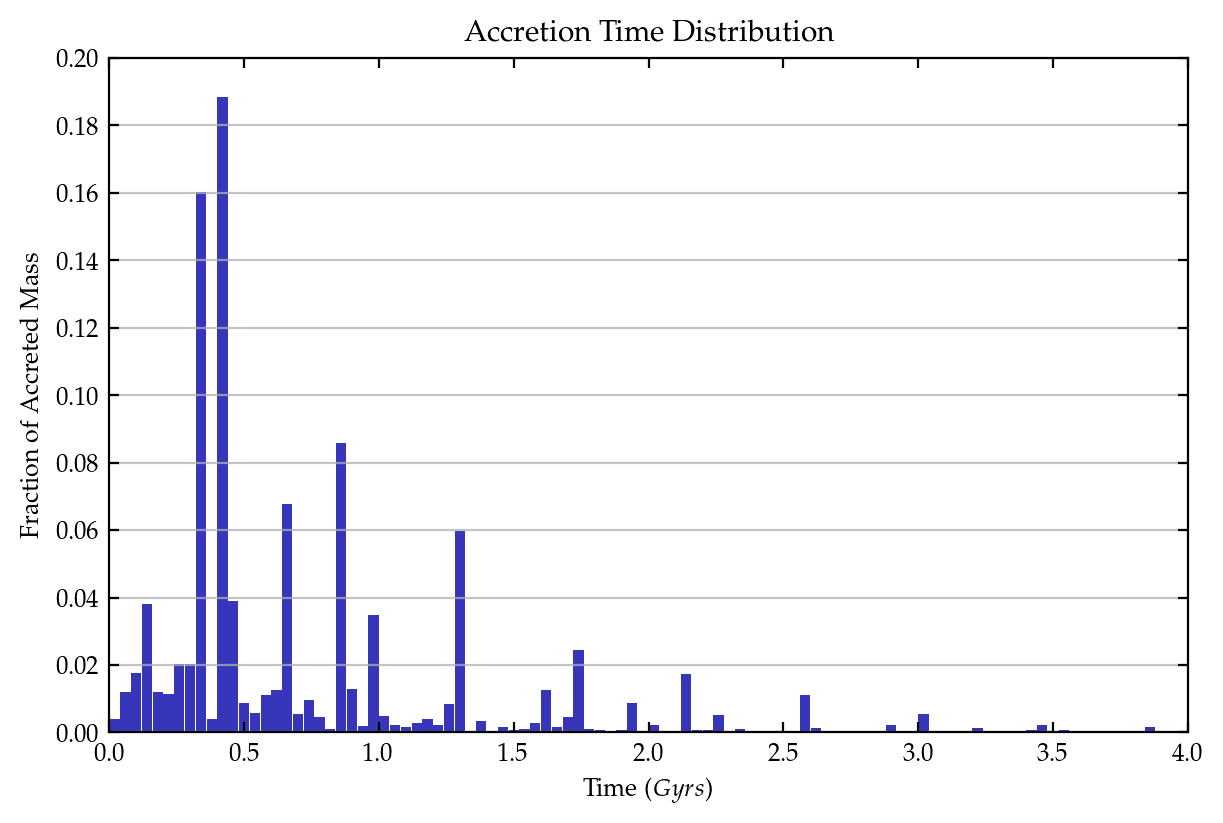

In [36]:
# basic histogram of accretion times to get a general sense of what the distribution looks like.
plt.figure()
plt.hist(accreted.recycleTime, bins=100, weights=accreted.weight, color='#0504aa', alpha=0.8, rwidth=0.95, range=(0, 4))


plt.grid(axis='y', alpha=0.75)
plt.xlabel('Time ($Gyrs$)')
plt.ylabel('Fraction of Accreted Mass')
plt.title('Accretion Time Distribution')

plt.xlim(0,4)
plt.ylim(0,0.2)

plt.locator_params(axis="x", nbins=10)
plt.locator_params(axis="y", nbins=10)

plt.show()

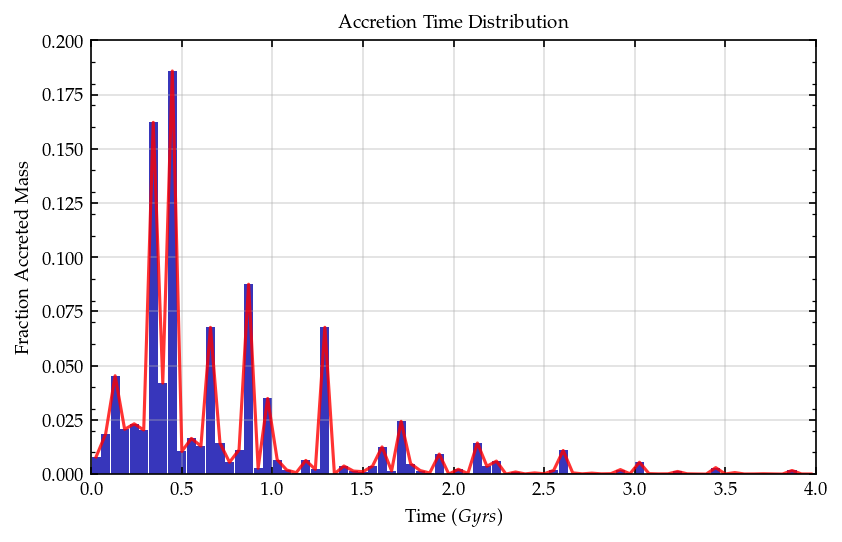

In [53]:
## basic histogram of accretion times to get a general sense of what the distribution looks like ##

bins = 76
fig, ax = plt.subplots(1,1,dpi=150, figsize=(5.5,3.5), constrained_layout=True) # change to dpi=300 for printout.


# sne-heated pre-discharge.
y1, x = np.histogram(accreted.recycleTime, bins=bins, weights=accreted.weight, range=(0, 4))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, alpha=0.8, c='red')

# sne-heated discharge.
ax.hist(accreted.recycleTime, bins=bins, weights=accreted.weight, color='#0504aa', alpha=0.8, rwidth=0.95, range=(0, 4))

ax.set_title('Accretion Time Distribution', fontsize='medium')
ax.set_xlabel(r'Time ($Gyrs$)')
ax.set_ylabel('Fraction Accreted Mass')
ax.set_xlim(0,4)
ax.set_ylim(0,0.2)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05e10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))
 
ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')

plt.show()

Alright, so this distribution suggests a significant portion of gas that is accreted is done so rather quickly. Now, it would be nice if we could sniff out some correlations. Let us start by looking at the relationships (or lack thereof) between accretion times and 

1) Supernova heating;

2) Distance discharged from satellite disk;

3) Degree of Ram Pressure Stripping; 

5) Exit/Entrance velocities at discharge; 

4) Temperatures.

<!-- filter for parameters (compare between discharged and accreted -- what discharged are not reaccreted) -->

### General Distribution of Accretion Times <a class="anchor" id="sne"></a>

We start off looking at the dynamic between accretion time and a gas particle's state of SNe heating (heated or not)

In [55]:
accreted.keys()

Index(['time', 'pid', 'rho', 'temp', 'mass', 'coolontime', 'r', 'r_per_Rvir',
       'x', 'y', 'z', 'satRvir', 'a', 'vx', 'vy', 'vz', 'v', 'r_rel_host',
       'r_rel_host_per_Rvir', 'x_rel_host', 'y_rel_host', 'z_rel_host',
       'hostRvir', 'vx_rel_host', 'vy_rel_host', 'vz_rel_host', 'v_rel_host',
       'sat_Xc', 'sat_Yc', 'sat_Zc', 'sat_vx', 'sat_vy', 'sat_vz', 'host_Xc',
       'host_Yc', 'host_Zc', 'host_vx', 'host_vy', 'host_vz', 'sat_Mstar',
       'sat_Mgas', 'host_Mstar', 'host_Mgas', 'sat_r_half', 'sat_r_gas',
       'host_r_half', 'host_r_gas', 'in_sat', 'in_host', 'in_other_sat',
       'in_IGM', 'dt', 'r_gal', 'host_r_gal', 'sat_disk', 'sat_halo',
       'host_disk', 'host_halo', 'other_sat', 'IGM', 't', 'sat_Mvir',
       'recycleTime', 'key', 'weight'],
      dtype='object')

In [56]:
sim = str(key[:4])
haloid = int(key[5:])

data = read_tracked_particles(sim, haloid)
timesteps = read_timesteps(sim)
ts = timesteps[timesteps.z0haloid==haloid]
ts = ts.rename({'mass':'sat_Mvir'}, axis=1)
ts = ts[['t','sat_Mvir']]
ts['sat_Mvir'] = ts['sat_Mvir'].astype('float')


data = pd.merge_asof(data, ts.sort_values('t'), left_on='time', right_on='t', direction='nearest', tolerance=1)

filepath = '/home/lonzaric/astro_research/Stellar_Feedback_Code/SNeData/tracked_particles_v2.hdf5'
print(f'Saving {key} tracked_particles datasets to {filepath}')
data.to_hdf(filepath, key=key)

Saving h329_33 tracked_particles datasets to /home/lonzaric/astro_research/Stellar_Feedback_Code/SNeData/tracked_particles_v2.hdf5


### Code Testing <a class="anchor" id="proving"></a>

Testing out different data types and computations.

In [6]:
# pulling out a subset of 'discharged' containing those discharged particles with pids that match the pids of those
# in 'accreted'; calling it 'accdis'; the masking technique.

# Ids of preheated
x = np.array(pram['pid'])
# Ids of discharged, SNe heated gas
y = np.array(discharged['pid'])

index = np.argsort(x)
sorted_x = x[index] # Sorted list of ids pre discharged                        
sorted_index = np.searchsorted(sorted_x, y)
yindex = np.take(index, sorted_index, mode="clip")
mask = x[yindex] != y
result = np.ma.array(yindex, mask=mask)
pram_all = discharged.iloc[result[~result.mask].data]

KeyError: 'pid'